#**NAME: PARTHA SAKHA PAUL**

#**ROLL: MA23M016**

**PROGRAMMING ASSIGNMENT 3**

# **Stochastic Gradient Descent for Logistic Regression:**
In this project
we implement binary logistic regression. The primary goal in this exericse
is to experiment with the gradient and stochastic gradient descent methods
which will be used to determine the optimal parameters w. To that end,
you need a function to return gradient in (10.21) which should be of the
form:

    def fullGradient(w,X,y)
    where w is the vector with the parameters, and X, y are the training data

Likewise, for stochastic gradient you need

    g = randGradient(w,X,y,n)
    where n is the randomly selected component

You should also write a routine
of the form:

    fdescent(X,y,rho,job,nEpoch)
where job selects either the full gradient or the stochastic gradient method.

In [ ]:
import numpy as np

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

"""Negative Log Likelihood"""
def NLL(w, X, y):
    N = len(y)
    a = np.dot(X, w)
    return np.mean(np.log(1 + np.exp(-y * a)))

"""full gradient"""
def fullGradient(w, X, y):
    N = len(y)
    mu = sigmoid(np.dot(X, w))
    grad = np.dot(X.T, (mu - y)) / N
    return grad

"""stochastic gradient"""
def randGradient(w, X, y, n):
    mu = sigmoid(np.dot(X[n], w))
    grad = (mu - y[n]) * X[n]
    return grad

def fdescent(X, y, rho, job, nEpoch):
    N = X.shape[0]
    w = np.zeros(X.shape[1])  # Initialize w
    f = []  # To store the history of the functional

    if job == 'full':
        for epoch in range(nEpoch*N):
            w -= rho/np.sqrt(epoch+1) * fullGradient(w, X, y)
            f.append(NLL(w, X, y))

    for epoch in range(nEpoch):
        if job == 'stochastic':
            indices = np.random.permutation(N)
            for i in indices:
                w -= rho/np.sqrt(epoch*N + i + 1) * randGradient(w, X, y, i)
                f.append(NLL(w, X, y))

    return w, f

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 'df' is the DataFrame containing the dataset
df = pd.read_csv('smarket.csv')

# Converting Direction to binary
df['DirectionBinary'] = df['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

# Preparing features X and target y
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']].values
y = df['DirectionBinary'].values

#**Training and Test set**

In [ ]:
train_df = df[df['Year'] < 2005]
test_df = df[df['Year'] == 2005]
# print(train_df)
# print(test_df)

X_train = train_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']].values
y_train = train_df['DirectionBinary'].values

# Adding bias term - column of ones
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
# print(X_train_bias)

#**Testing the Method:**

**Compute the correlation matrix, leaving out the first column (i.e., the year).**

    Which variables show a significant correlation?

In [ ]:
import pandas as pd

correlation_matrix = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today','DirectionBinary']].corr()

# Display the correlation matrix
print(correlation_matrix)

significant_threshold = 0.2  # threshold
print("Significant Correlations (absolute values):")
for col in correlation_matrix.columns:
    significant_corrs = correlation_matrix[col][abs(correlation_matrix[col]) > significant_threshold].drop(col, errors='ignore')
    if not significant_corrs.empty:
        print(f"\n{col} correlated with:")
        print(significant_corrs)


                     Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Lag1             1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2            -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3            -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4            -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5            -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume           0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today           -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   
DirectionBinary -0.039757 -0.024081  0.006132  0.004215  0.005423  0.022951   

                    Today  DirectionBinary  
Lag1            -0.026155        -0.039757  
Lag2            -0.010250        -0.024081  
Lag3            -0.002448         0.006132  
Lag4            -0.006900         0.004215  
Lag5            -0.034860         0.005423  
Volume           0

**Q: Run your code for both full and stochastic descent and print out the histories f of the objective function in the same plot:**

    The values of nEpoch=2 or 3 should be sufficient to get good answers.

In [ ]:
# Initialize parameters
rho = 1  # initializing Learning rate
nEpoch = 3  # Number of epochs

# Full Gradient Descent
job = 'full'
w_optimal_full, f_history_full = fdescent(X_train_bias, y_train, rho, job, nEpoch)

# Stochastic Gradient Descent
job = 'stochastic'
w_optimal_stochastic, f_history_stochastic = fdescent(X_train_bias, y_train, rho, job, nEpoch)

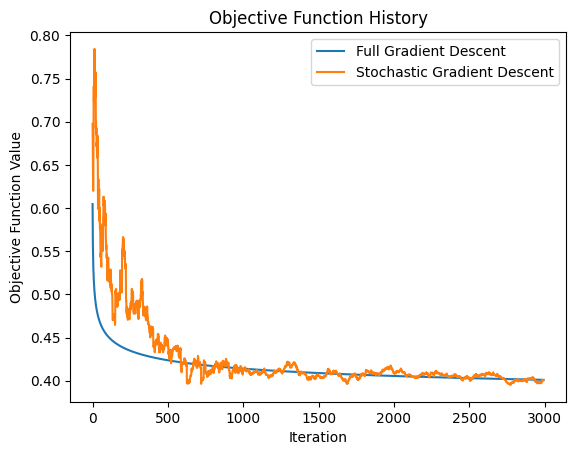

In [ ]:
import matplotlib.pyplot as plt

plt.plot(f_history_full, label='Full Gradient Descent')
plt.plot(f_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function History')
plt.legend()
plt.show()

**Q: Which methods gives better results and which method uses fewer floating point operations?**

**Answer:**

    Full Gradient Descent computes the gradient using the entire dataset.
    
    This method can provide more accurate and stable updates per iteration,
    
    since it considers all data points, leading to better convergence to the global minimum for convex problems or a good local minimum for non-convex problems also.

    Stochastic Gradient Descent performs significantly fewer floating
    point operations per iteration since it only processes one data point at a time.

    Whereas Full Gradient Descent computes the gradient over the entire dataset at each step, leading to a high computational cost per iteration, especially with large datasets.

**Q: Write another subroutine that creates a table that contains for each test point the probabilies and classifiers of both optimization methods, and the actual direction from the test set. How many days were misclassified?**

In [ ]:
def predict(X, w):
    """ model predictions (probabilities and classes) given features X and weights w."""
    probabilities = sigmoid(np.dot(X, w))
    classes = (probabilities > 0.5).astype(int)  # Classify as 'Up' (1) if probability > 0.5 else 'Down' (0)
    return probabilities, classes

# Prepare the test set
X_test = test_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']].values
y_test = test_df['DirectionBinary'].values
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Predict using both models
prob_full, classes_full = predict(X_test_bias, w_optimal_full)
prob_stochastic, classes_stochastic = predict(X_test_bias, w_optimal_stochastic)

# Create a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Probability (Full)': prob_full,
    'Prediction (Full)': classes_full,
    'Probability (Stochastic)': prob_stochastic,
    'Prediction (Stochastic)': classes_stochastic,
    'Actual Direction': y_test
})

# Converting binary predictions back to 'Up'/'Down'
results_df['Prediction (Full)'] = results_df['Prediction (Full)'].map({1: 'Up', 0: 'Down'})
results_df['Prediction (Stochastic)'] = results_df['Prediction (Stochastic)'].map({1: 'Up', 0: 'Down'})
results_df['Actual Direction'] = results_df['Actual Direction'].map({1: 'Up', 0: 'Down'})

print(results_df)

# Compute misclassifications
misclassified_full = (results_df['Prediction (Full)'] != results_df['Actual Direction']).sum()
misclassified_stochastic = (results_df['Prediction (Stochastic)'] != results_df['Actual Direction']).sum()

print(f"Days misclassified (Full): {misclassified_full}")
print(f"Days misclassified (Stochastic): {misclassified_stochastic}")

     Probability (Full) Prediction (Full)  Probability (Stochastic)  \
0              0.012267              Down                  0.011462   
1              0.001961              Down                  0.001797   
2              0.132266              Down                  0.130828   
3              0.880739                Up                  0.883021   
4              0.321190              Down                  0.314694   
..                  ...               ...                       ...   
247            0.562085                Up                  0.560886   
248            0.005567              Down                  0.005147   
249            0.677703                Up                  0.686128   
250            0.186253              Down                  0.179852   
251            0.066862              Down                  0.064057   

    Prediction (Stochastic) Actual Direction  
0                      Down             Down  
1                      Down             Down  
2     

**Q: Is this a get rich quick scheme?**

    To make our model work as a predictor of the direction of the following day you simply have to move the last column one unit up.

    Then the n-th row contains the direction of the stock market for the n+1-st day.

    This way the first entry in this column is lost and the last row with no entry in the last column must be deleted, but this is inconsequential.

    Run the classification again with this modified data set.

    How many days are you misclassifying with the modified data set?

**for making the modified csv file as per the question**

In [ ]:
import pandas as pd
df = pd.read_csv('smarket.csv')

df['Direction'] = df['Direction'].shift(-1)
df.to_csv('smarket_modified.csv',index = False)

**same thing as we have done before**

In [ ]:
# 'df' is the DataFrame containing the dataset
df1 = pd.read_csv('smarket_modified.csv')

# Converting Direction to binary
df1['DirectionBinary'] = df1['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

In [ ]:
train_df1 = df1[df1['Year'] < 2005]
test_df1 = df1[df1['Year'] == 2005]


X_train1 = train_df1[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']].values
y_train1 = train_df1['DirectionBinary'].values

# Adding bias term - column of ones
X_train_bias1 = np.c_[np.ones(X_train1.shape[0]), X_train1]

In [ ]:
# Initialize parameters
rho = 1  # initializing Learning rate
nEpoch = 3  # Number of epochs

# Full Gradient Descent
job = 'full'
w_optimal_full, f_history_full = fdescent(X_train_bias1, y_train1, rho, job, nEpoch)

# Stochastic Gradient Descent
job = 'stochastic'
w_optimal_stochastic, f_history_stochastic = fdescent(X_train_bias1, y_train1, rho, job, nEpoch)

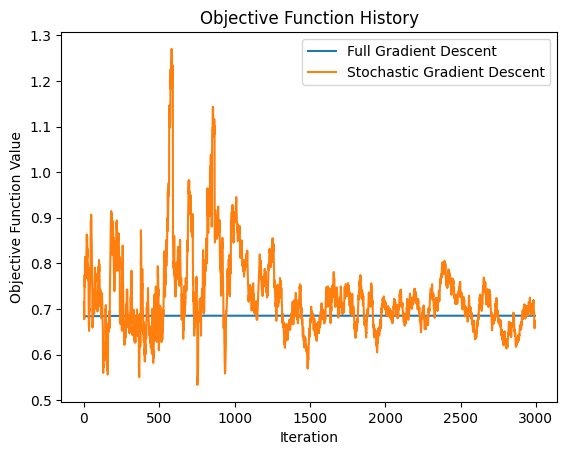

In [ ]:
import matplotlib.pyplot as plt

plt.plot(f_history_full, label='Full Gradient Descent')
plt.plot(f_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function History')
plt.legend()
plt.show()

In [ ]:
def predict(X, w):
    """ model predictions (probabilities and classes) given features X and weights w."""
    probabilities = sigmoid(np.dot(X, w))
    classes = (probabilities > 0.5).astype(int)  # Classify as 'Up' (1) if probability > 0.5 else 'Down' (0)
    return probabilities, classes

# Prepare the test set
X_test = test_df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume','Today']].values
y_test = test_df['DirectionBinary'].values
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Predict using both models
prob_full, classes_full = predict(X_test_bias, w_optimal_full)
prob_stochastic, classes_stochastic = predict(X_test_bias, w_optimal_stochastic)

# Create a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Probability (Full)': prob_full,
    'Prediction (Full)': classes_full,
    'Probability (Stochastic)': prob_stochastic,
    'Prediction (Stochastic)': classes_stochastic,
    'Actual Direction': y_test
})

# Converting binary predictions back to 'Up'/'Down'
results_df['Prediction (Full)'] = results_df['Prediction (Full)'].map({1: 'Up', 0: 'Down'})
results_df['Prediction (Stochastic)'] = results_df['Prediction (Stochastic)'].map({1: 'Up', 0: 'Down'})
results_df['Actual Direction'] = results_df['Actual Direction'].map({1: 'Up', 0: 'Down'})

print(results_df)

# Compute misclassifications
misclassified_full = (results_df['Prediction (Full)'] != results_df['Actual Direction']).sum()
misclassified_stochastic = (results_df['Prediction (Stochastic)'] != results_df['Actual Direction']).sum()

print(f"Days misclassified (Full): {misclassified_full}")
print(f"Days misclassified (Stochastic): {misclassified_stochastic}")

     Probability (Full) Prediction (Full)  Probability (Stochastic)  \
0              0.493047              Down                  0.563371   
1              0.535841                Up                  0.641696   
2              0.539493                Up                  0.624887   
3              0.517841                Up                  0.589854   
4              0.512144                Up                  0.550815   
..                  ...               ...                       ...   
247            0.530153                Up                  0.498526   
248            0.521539                Up                  0.538052   
249            0.525775                Up                  0.549886   
250            0.507056                Up                  0.589855   
251            0.513723                Up                  0.596345   

    Prediction (Stochastic) Actual Direction  
0                        Up             Down  
1                        Up             Down  
2     